# Assignment 1
Submitted by : Timothy Ng Tik Ti

## Housing
- For this problem, use only 1 target output variable **price**
- Prepare the data and perform necessary feature engineering
- Create **_at least two models_** 
- Evaluate the models and pick the best candidate
- Form some conclusions

In [2]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

import sklearn
import numpy as np
import pandas as pd
import matplotlib
import platform
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.20.3
Numpy version=1.16.2
Pandas version=0.24.2
Matplotlib version=3.0.3
Seaborn version=0.9.0
Python version=3.7.3


# Data Importing¶

In [3]:
kchousedf = pd.read_csv("kc_house_data.csv")
kchousedf.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
kchousedf.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# Exploratory Data Analysis

In [5]:
kchousedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
kchousedf.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


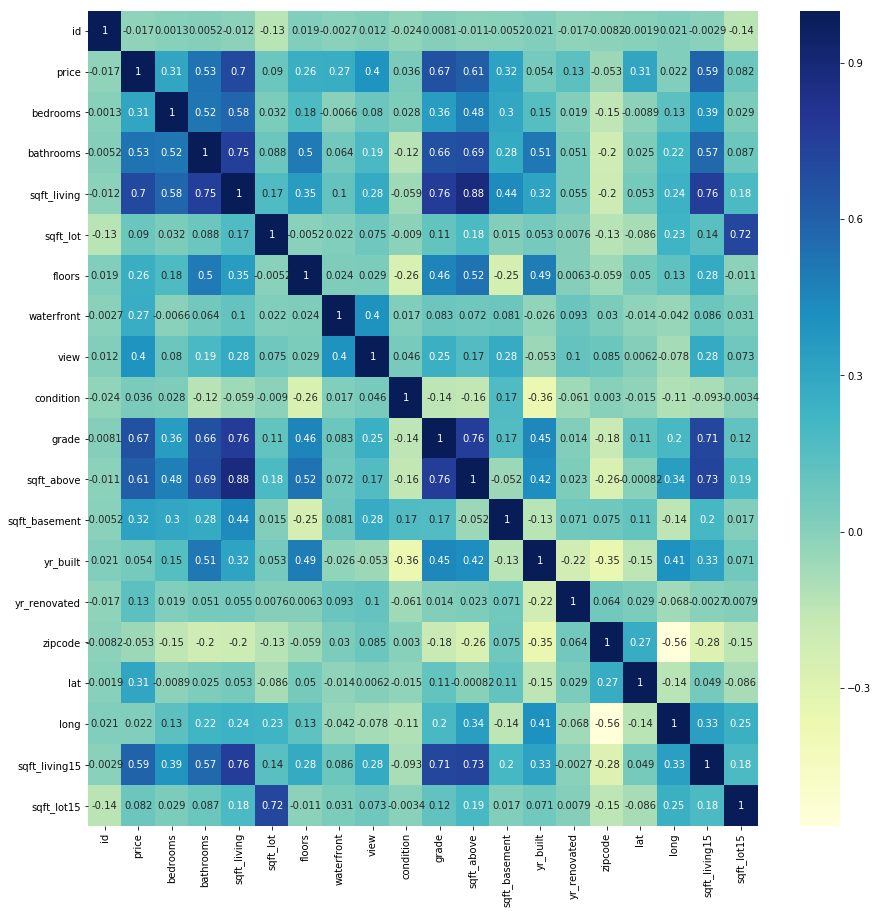

In [7]:
plt.subplots(figsize=(15,15))
corr = kchousedf.corr()
sns.heatmap(corr, cmap="YlGnBu",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

#  Data Preparation

Most of the data is clean but we need to drop some input columns that
are related to each other (multi-colinearity) for e.g.  
* sqft_living15 (drop) and sqft_above (drop): related to sqft_living  
* sqft_lot15 (drop): related to sqft_lot  
  
  
* We will drop the id field because it is a running sequence  
* We will drop the date field because we want to determine the price independent of time

In [8]:
housedf = kchousedf.drop(["id","date","sqft_above","sqft_living15","sqft_lot15"],axis=1)
housedf.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,1530,2001,0,98053,47.6561,-122.005
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,0,1995,0,98003,47.3097,-122.327
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,0,1963,0,98198,47.4095,-122.315
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,730,1960,0,98146,47.5123,-122.337
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,0,2003,0,98038,47.3684,-122.031


In [9]:
# Since all values are numeric, do a correlation and sort to determine
# the most important features relative to price
corr = housedf.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr["price"])

price            1.000000
sqft_living      0.702035
grade            0.667434
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


In [11]:
# we will remove all features with an absolute correlation with the target variable which is smaller than 0.2.

corr_target = abs(corr['price'])

# Display features with correlation < 0.2
remove_features = corr_target[corr_target < 0.2]
remove_features

yr_renovated    0.126434
sqft_lot        0.089661
yr_built        0.054012
condition       0.036362
long            0.021626
zipcode         0.053203
Name: price, dtype: float64

In [12]:
# Further dropping features with correlation < 0.2
housedf = housedf.drop(['sqft_lot', 'condition', 'yr_built', 'yr_renovated', 'zipcode', 'long'], axis=1)
housedf.head(10)

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_basement,lat
0,221900.0,3,1.00,1180,1.0,0,0,7,0,47.5112
1,538000.0,3,2.25,2570,2.0,0,0,7,400,47.7210
2,180000.0,2,1.00,770,1.0,0,0,6,0,47.7379
3,604000.0,4,3.00,1960,1.0,0,0,7,910,47.5208
4,510000.0,3,2.00,1680,1.0,0,0,8,0,47.6168
5,1225000.0,4,4.50,5420,1.0,0,0,11,1530,47.6561
6,257500.0,3,2.25,1715,2.0,0,0,7,0,47.3097
7,291850.0,3,1.50,1060,1.0,0,0,7,0,47.4095
8,229500.0,3,1.00,1780,1.0,0,0,7,730,47.5123
9,323000.0,3,2.50,1890,2.0,0,0,7,0,47.3684


We are now left with 9 features which will be proceeded into the model

## Handle missing values

There are no missing values for the Housing data set

# Train Model¶

## Split Data into Train and Test Sets

In [13]:
from sklearn.model_selection import train_test_split
y = housedf["price"].values
X = housedf.drop(["price"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

## Train Model with Algorithm: Linear Model
OLS without regularization
https://scikit-learn.org/stable/modules/linear_model.html

Ridge Regularization
https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

Lasso Regularization
https://scikit-learn.org/stable/modules/linear_model.html#lasso

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV   

# fit a linear regression model to the data
linmodel = LinearRegression()
#to find the best hyperparameter for our linmodel

parameters = [{'fit_intercept': [0,1], 'normalize': [0,1]}]
              
grid_search_linmodel = GridSearchCV(estimator = linmodel,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search_linmodel.fit(X_train, y_train)
grid_search_linmodel.best_params_
#print(grid_search_linmodel)

{'fit_intercept': 1, 'normalize': 0}

In [29]:
from sklearn.linear_model import Lasso

# fit a linear regression model to the data
lassomodel = Lasso()
#to find the best hyperparameter for our lassomodel

parameters = [{'fit_intercept': [0,1],'normalize': [0,1]}]
              
grid_search_lassomodel = GridSearchCV(estimator = lassomodel,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = 10,
                           n_jobs = -1)
grid_search_lassomodel.fit(X_train, y_train)
grid_search_lassomodel.best_params_


#print(lassomodel)

{'fit_intercept': 1, 'normalize': 1}

# Score and Evaluate Model

## Score Model and Evaluate Model with: Linear Model¶

In [22]:
from sklearn.metrics import r2_score

yhat_train = grid_search.predict(X_train)
yhat_test = grid_search.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.660213648141321
R2 Score for test=0.6467378883618295


In [30]:
from sklearn.metrics import r2_score

yhat_train = grid_search_lassomodel.predict(X_train)
yhat_test = grid_search_lassomodel.predict(X_test)
print("R2 Score for train={}".format(r2_score(y_train,yhat_train))) # R2 score, 1.0 is best
print("R2 Score for test={}".format(r2_score(y_test,yhat_test)))

R2 Score for train=0.6602119819468284
R2 Score for test=0.6467200781961646


##  Score and Evaluate Stupid Baseline (predict the mean)

In [60]:
mean_price = y.mean()
print("mean price={}".format(mean_price))

mean price=540088.1417665294


In [61]:
ystupid = np.full(len(y),mean_price)
ystupid

array([540088.14176653, 540088.14176653, 540088.14176653, ...,
       540088.14176653, 540088.14176653, 540088.14176653])

In [62]:
print("R2 Score for stupid baseline is={}".format(r2_score(y,ystupid)))

R2 Score for stupid baseline is=0.0


# Conclusions

*	How is your prediction task defined? And what is the meaning of the output variable?
*	How do you represent your data as features?
*	Did you process the features in any way?
*	Did you bring in any additional sources of data?
*	How did you select which learning algorithms to use?
*	Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
*	How do you evaluate the quality of your system?
*	How well does your system compare to a stupid baseline?
> The stupid baseline int the case of regression is to use the mean price as the prediction for all houses  
> The DummyRegressor can be found in Scikit-Learn https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html
*	Can you say anything about the errors that the system makes?
*	Is it possible to something about which features the model considers important? say


Conclusions:

Prediction task is defined as predicting the price of the houses based on the features, as such, the output variable is price. 

To determine and process the features, we used correlation to determine if they are dependent on each other, or with price. We removed features that are highly correlated with each other, and with very low correlation with price, to train a model with better accuracy.

Since the model is all numeric for sklearn, and there's no null values within, not much processing is done except for dropping less relevant columns. 

In order to decide which learning algorithm to use, since the prediction task is numeric in nature, we will use regression models. In this assignment, we used linear regression as well as lasso.

Based on the R2 values, after tuning our hyperparameters using GridSearchCV function, both linear regression model and lasso are very similar in terms of effectiveness in prediction as they have similar R2 values. The system is better than stupid baseline as the R2 value of our linear model is 0.66 while for stupid baseline its 0. 